# Análise de confiabilidade do traçado cefalométrico automático

Nesse notebook vamos avaliar a precisão obtida pelo traçado automático quando comparado à especialistas. Foram comparados os pontos utilizados nas análises de USP, McNamara e Ricketts. Essas análises foram escolhidas porque são responsáveis por aproximadamente 80% das análises requisitadas pelos dentistas brasileiros segundo o Cfaz.net.

O arquivo dados_especialista.csv contem a marcação dos pontos feito por 4 especialistas e também pelo traçado 
automático. A coluna `especialist` define o responsável pela marcação dos pontos.

In [1]:
import pandas as pd

# Dados de marcação de pontos dos especialista
data = pd.read_csv("dados_especialista.csv")
data

,number,name,x,y,especialist
0,2,N - Násio,575.395,252.892,Especialista 2
1,3,Or - Orbital,532.841,366.369,Especialista 2
2,11,Po - Pório,177.813,403.444,Especialista 2
3,13,Ba - Básio,183.567,485.013,Especialista 2
4,17,Co - Condílio,209.103,419.371,Especialista 2
...,...,...,...,...,...
240,35,P' - Ponto P Linha,605.151,479.608,Automático
241,89,V - Ponto V,560.018,745.430,Automático
242,90,T - Ponto T,570.434,672.459,Automático
243,91,Tuber - Tuber,372.544,533.467,Automático


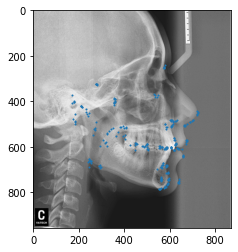

In [2]:
# Todas as marcações visualizadas na imagem para garantir que o dataset está correto

import matplotlib.pyplot as plt

img = plt.imread("figuras/Teleradiografia.jpg")
fig, ax = plt.subplots()
ax.imshow(img,cmap='gray')
ax.scatter(data["x"], data["y"],s=1)

In [3]:
# Criamos uma referência ouro usando os especialistas que fizeram o exame.
# A referencia representa o ponto mêdio marcado elos especialistas.

especialists = data[data["especialist"].isin(["Especialista 1",
                                              "Especialista 2",
                                              "Especialista 3",
                                              "Especialista 4"])]

reference = especialists[["name","x","y"]].groupby('name').mean()
reference.head()

,x,y
name,,
/3 - Incisal do Canino Inferior,582.30200,602.38625
/6 - Contato Mesial do Primeiro Molar Inferior,489.24250,608.36125
3/ - Incisal do Canino Superior,574.77925,605.17425
6/ - Contato Mesial do Primeiro Molar Superior,487.90800,586.10775
A - Ponto A,609.95200,506.36775


In [4]:
# Definimos uma função para calcular o erro do ponto marcado.
# O erro é representado pela distância euclidiana entre o ponto e a referência.

import math

def euclidian_distance(x,y,name):
    
    delta_x = x-reference.loc[name].x
    delta_y = y-reference.loc[name].y
    distance = math.sqrt(delta_x**2 + delta_y**2)

    return distance

In [5]:
# Calculamos o erro e adicionamos ao dataframe.

data['error_px'] = data.apply(lambda x: euclidian_distance(x['x'], x['y'], x['name']), axis=1)

# Também calculamos o erro em milimetros para termos dimensão do erro.
# Para a DPI dessa imagem o fator de conversão de px para mm é 0.22664325925925924
data['error_mm'] = data['error_px'] * 0.22664325925925924
data

,number,name,x,y,especialist,error_px,error_mm
0,2,N - Násio,575.395,252.892,Especialista 2,4.606669,1.044071
1,3,Or - Orbital,532.841,366.369,Especialista 2,9.500247,2.153167
2,11,Po - Pório,177.813,403.444,Especialista 2,9.374026,2.124560
3,13,Ba - Básio,183.567,485.013,Especialista 2,5.729195,1.298483
4,17,Co - Condílio,209.103,419.371,Especialista 2,4.062192,0.920669
...,...,...,...,...,...,...,...
240,35,P' - Ponto P Linha,605.151,479.608,Automático,4.492272,1.018143
241,89,V - Ponto V,560.018,745.430,Automático,1.492175,0.338191
242,90,T - Ponto T,570.434,672.459,Automático,5.003505,1.134011
243,91,Tuber - Tuber,372.544,533.467,Automático,19.868154,4.502983


In [6]:
# Calculamos o erro total de cada especialista para avaliar quem teve maior erro entre os especialista.
# E principalmente como o automático se compara ao desenpenho dos especialistas.

error = data[["especialist","error_mm"]].groupby("especialist").sum().sort_values(by="error_mm")
error = error.rename(columns={"error_mm":"sum_error"})
error

,sum_error
especialist,
Especialista 1,73.464307
Especialista 2,80.369006
Automático,82.879380
Especialista 4,83.255594
Especialista 3,100.385631
